In [5]:
import pandas as pd  
import matplotlib.pyplot as plt

df = pd.read_csv("df_normalizado.csv", encoding="latin1")  
df

,Fecha,Dia,ID_Dia,Sistema,ID_Sistema,Cantidades,ID_Cantidades,Base,ID_Base,Volumen
0,01/01/2023,sunday,7,Morelia,2,Historico,1,Firme,1,2177.00000
1,01/01/2023,sunday,7,Morelia,2,Historico,1,Flexible,2,885.00000
2,01/01/2023,sunday,7,Morelia,2,Historico,1,Volumetrica,3,314.50000
3,01/01/2023,sunday,7,Morelia,2,Historico,1,Nominacion,4,3376.59000
4,01/01/2023,sunday,7,Morelia,2,Historico,1,Medicion real,5,2405.59284
...,...,...,...,...,...,...,...,...,...,...
23387,31/12/2024,tuesday,2,Uruapan,1,Distribucion transporte,3,Volumetrica,3,0.00000
23388,31/12/2024,tuesday,2,Uruapan,1,Distribucion transporte,3,Interrumpible,7,0.00000
23389,31/12/2024,tuesday,2,Uruapan,1,Distribucion transporte,3,Cana,6,0.00000
23390,31/12/2024,tuesday,2,Uruapan,1,Incumplimientos,4,Firme,1,1677.60452


Porcentaje de Firme: 59.84%


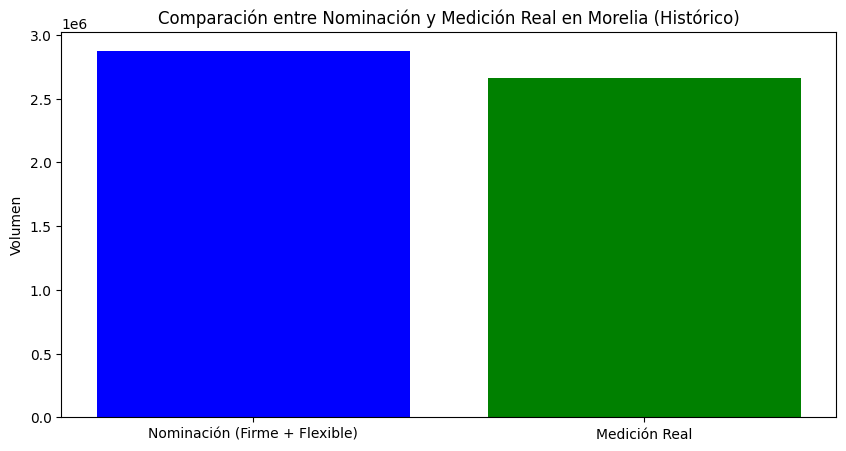

In [6]:


# Filtrar datos solo para la categoría "Histórico" en Morelia
df_morelia_historico = df[(df["Sistema"] == "Morelia") & (df["Cantidades"] == "Historico")]

# Sumar los valores de "Firme", "Flexible" y "Volumétrica"
total_firme = df_morelia_historico[df_morelia_historico["Base"] == "Firme"]["Volumen"].sum()
total_flexible = df_morelia_historico[df_morelia_historico["Base"] == "Flexible"]["Volumen"].sum()
total_volumetrica = df_morelia_historico[df_morelia_historico["Base"] == "Volumetrica"]["Volumen"].sum()

# Calcular el porcentaje de Firme respecto al total
total_general = total_firme + total_flexible + total_volumetrica
porcentaje_firme = (total_firme / total_general) * 100 if total_general > 0 else 0
print(f"Porcentaje de Firme: {porcentaje_firme:.2f}%")

# Graficar nominación (Firme + Flexible) y medición real
df_nominacion = df_morelia_historico[df_morelia_historico["Base"].isin(["Firme", "Flexible"])]
df_medicion_real = df_morelia_historico[df_morelia_historico["Base"] == "Medicion real"]

# Crear las gráficas
plt.figure(figsize=(10, 5))
plt.bar(["Nominación (Firme + Flexible)", "Medición Real"],
        [df_nominacion["Volumen"].sum(), df_medicion_real["Volumen"].sum()],
        color=["blue", "green"])

plt.ylabel("Volumen")
plt.title("Comparación entre Nominación y Medición Real en Morelia (Histórico)")
plt.show()
